In [1]:
# Standard imports
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

In [2]:
# Load scale audio into librosa
scale_fpath = os.path.join("audio", "scale.wav")
scale, sr = librosa.load(path=scale_fpath)

Just for my own education, I created a custom implementation of the Mel filterbank for comparison with librosa's

In [3]:
from mel import create_mel_filterbanks

In [4]:
bands = 40
f_size = 512
sr = 16_000

M_custom = create_mel_filterbanks(num_mel_bands=bands, frame_size=f_size, sr=sr)
M_librosa = librosa.filters.mel(sr=sr, n_fft=f_size, n_mels=bands)

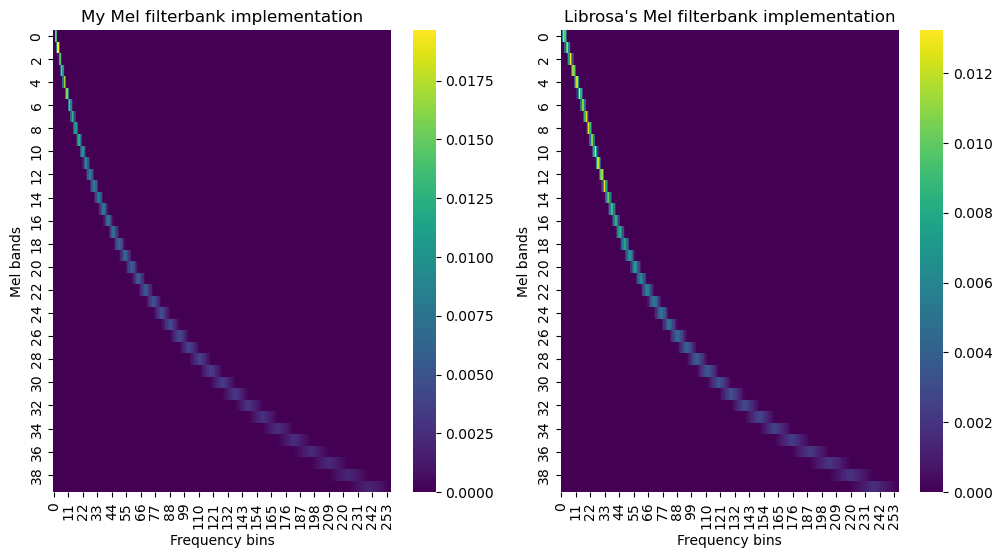

In [5]:
import seaborn as sns

# Visualize each one separately
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(M_custom, cmap='viridis')
plt.title("My Mel filterbank implementation")
plt.xlabel("Frequency bins")
plt.ylabel("Mel bands")

plt.subplot(1, 2, 2)
sns.heatmap(M_librosa, cmap='viridis')
plt.title("Librosa's Mel filterbank implementation")
plt.xlabel("Frequency bins")
plt.ylabel("Mel bands")

plt.show()

Now, lets extract Mel spectrograms using librosa's implementation

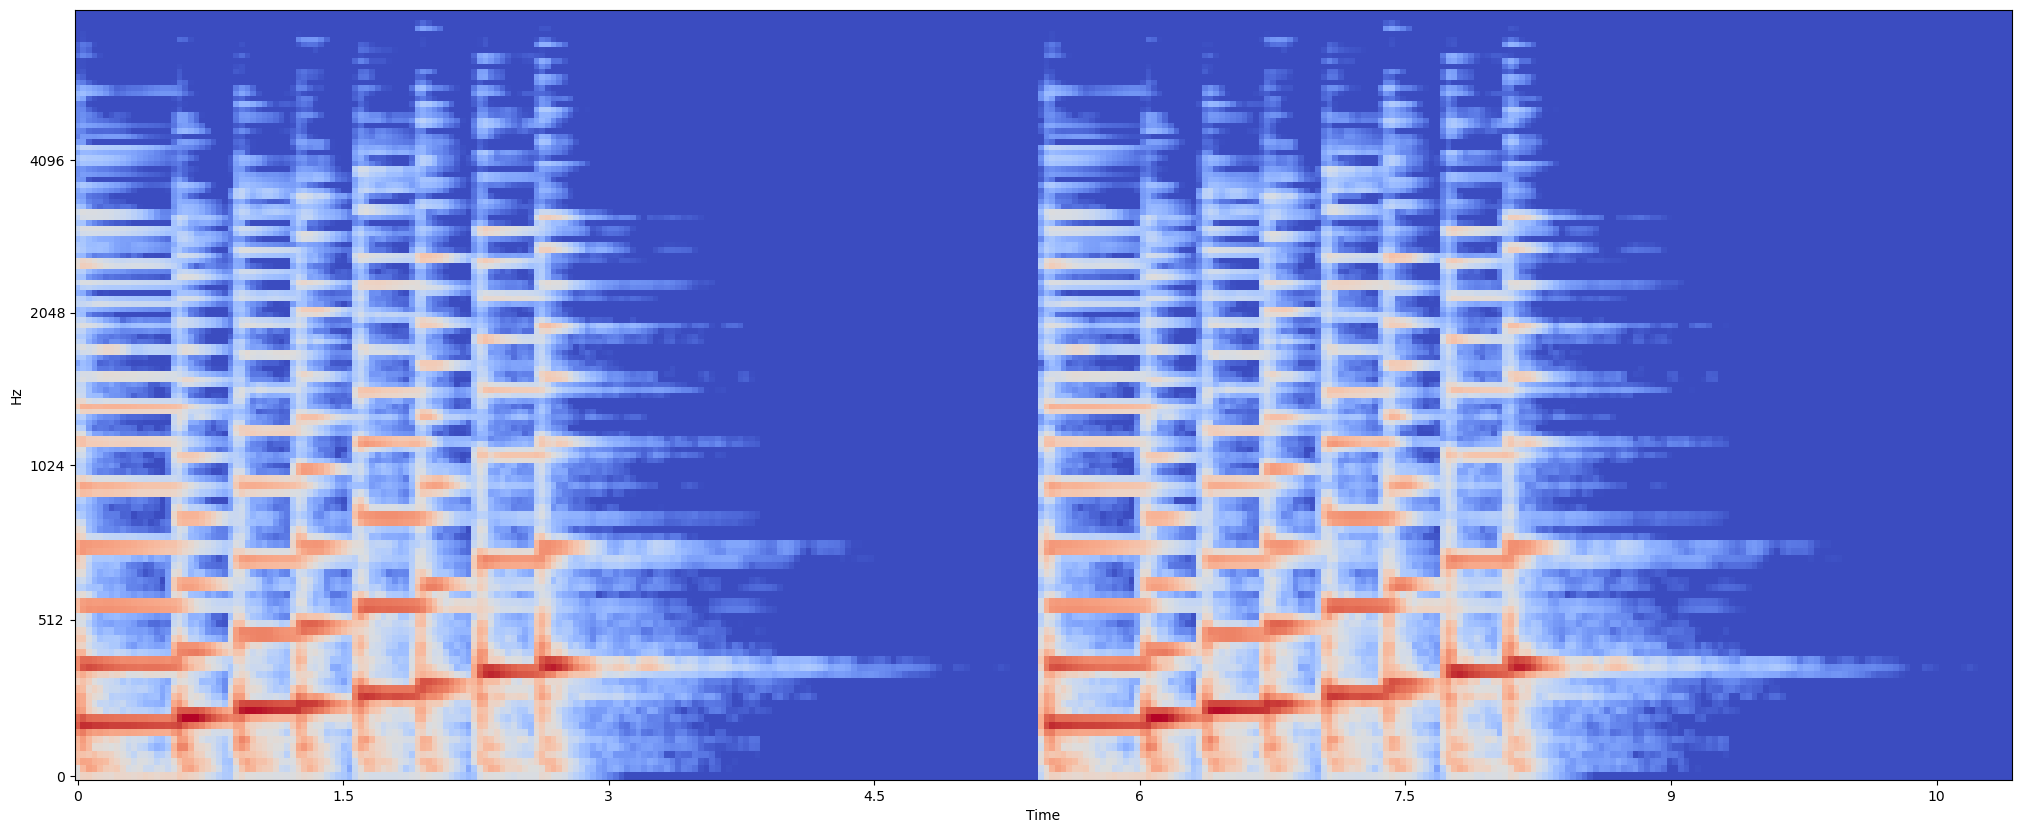

In [6]:
# Create a mel spectrogram using librosa
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, hop_length=512, n_fft=2048, n_mels=128)

# Convert to decibels
mel_spectrogram_dec = librosa.power_to_db(mel_spectrogram)

# Plot
plt.figure(figsize=(25, 10))
librosa.display.specshow(
    data=mel_spectrogram_dec,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
plt.show()

In [7]:
Y = librosa.stft(y=scale, n_fft=512, hop_length=512)
Y = np.abs(Y)
Y.shape

(257, 342)

In [8]:
M_scale_custom = create_mel_filterbanks(num_mel_bands=128, frame_size=512, sr=sr)
M_scale_custom.shape

(128, 257)

In [9]:
MY = M_scale_custom @ Y
MY.shape

(128, 342)

In [10]:
MY_dec = librosa.power_to_db(MY)

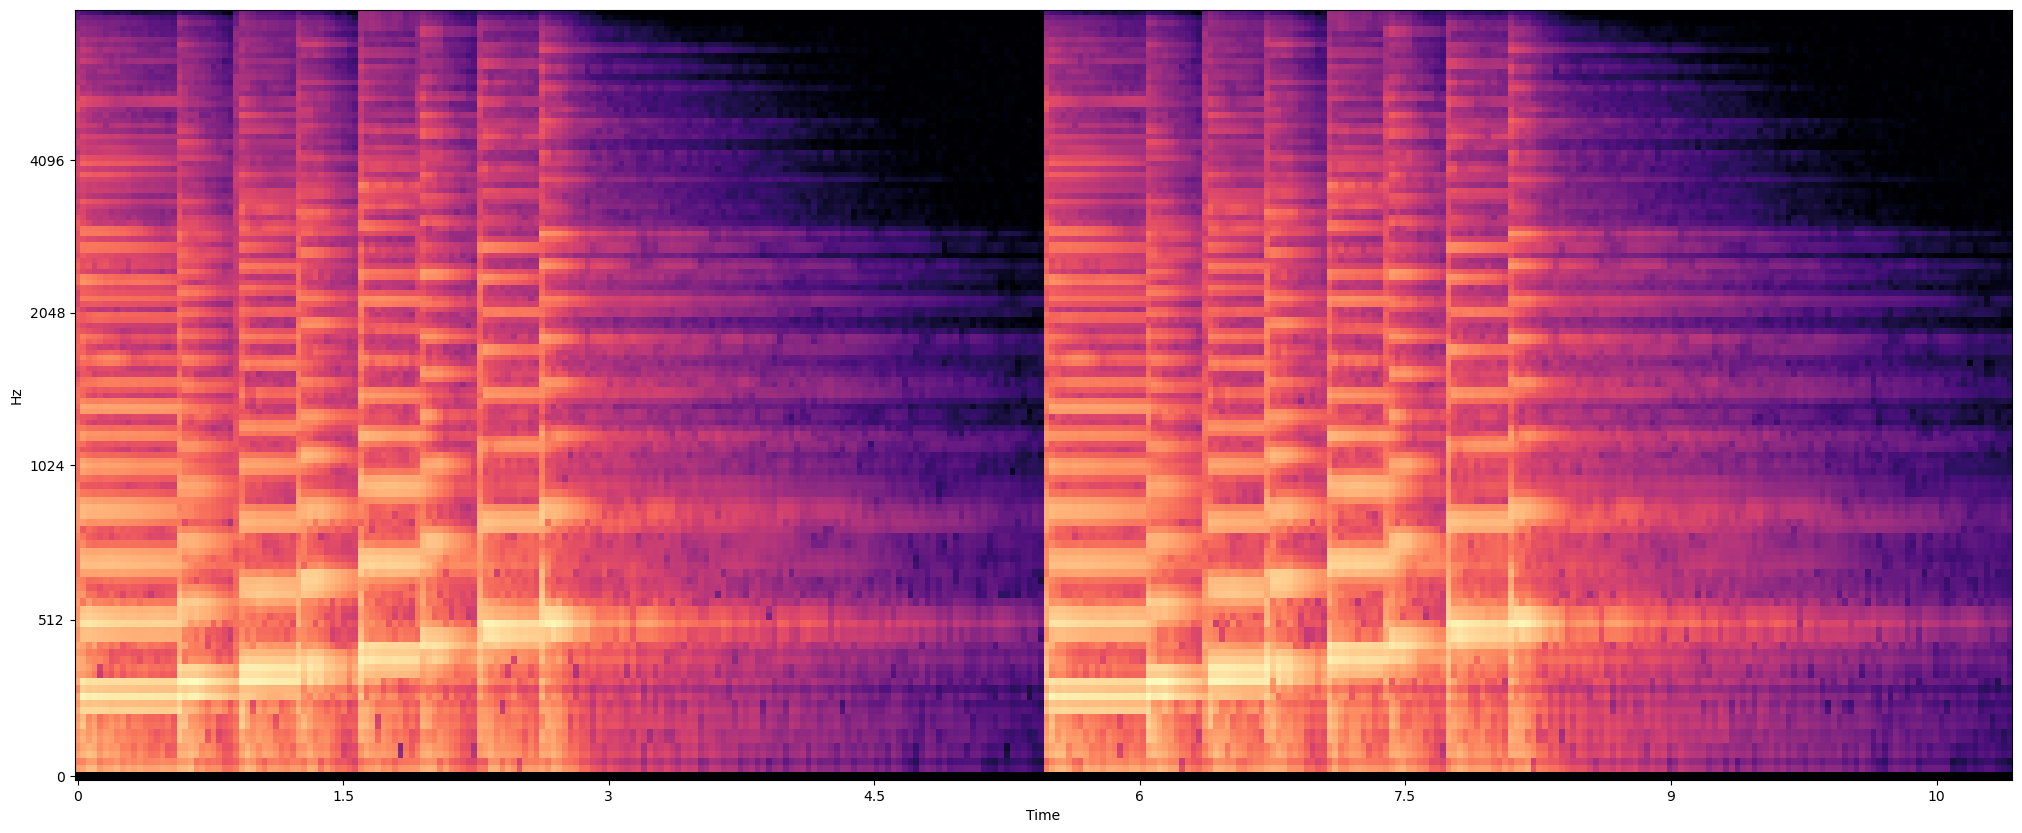

In [11]:
# Plot
plt.figure(figsize=(25, 10))
librosa.display.specshow(
    data=MY_dec,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
plt.show()